# **Assignment Q3**

In [1]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

In [ ]:
# Build weighted adjacency list: adjacency[u][v] = weight
adjacency = defaultdict(lambda: defaultdict(float))

with open("C://Users//dhvan//Downloads//NetworkScience//Assignment1//weighted_graph//soc-sign-bitcoinalpha.csv", "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        src, dst, weight, _ = row
        src, dst, weight = int(src), int(dst), float(weight)
        adjacency[src][dst] = adjacency[src].get(dst, 0) + weight

# Precompute a list of nodes to iterate safely
nodes = list(adjacency.keys())

# Weighted degree: sum of absolute outgoing weights
weighted_degree = {}
for u in nodes:
    weighted_degree[u] = sum(abs(w) for w in adjacency[u].values())

# Weighted clustering coefficient
weighted_clustering = {}
for i in nodes:
    neighbors = list(adjacency[i].keys())
    ki = len(neighbors)
    if ki < 2:
        weighted_clustering[i] = 0.0
        continue
    si = sum(abs(adjacency[i][n]) for n in neighbors)
    tri_sum = 0.0
    for idx_j in range(ki):
        for idx_k in range(idx_j + 1, ki):
            j = neighbors[idx_j]
            k = neighbors[idx_k]
            if (j in adjacency) and (k in adjacency[j]):
                w_ij = abs(adjacency[i][j])
                w_ik = abs(adjacency[i][k])
                w_jk = abs(adjacency[j][k])
                tri_sum += (w_ij + w_ik) / 2 * w_jk
    weighted_clustering[i] = tri_sum / (si * (ki - 1))

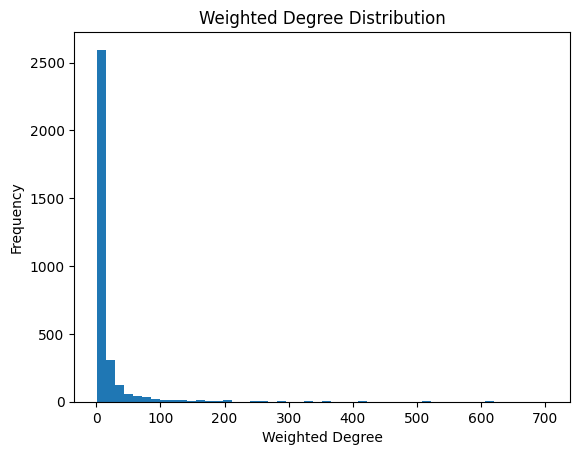

In [4]:
# Plot degree distribution
plt.hist(weighted_degree.values(), bins=50)
plt.title("Weighted Degree Distribution")
plt.xlabel("Weighted Degree")
plt.ylabel("Frequency")
plt.show()

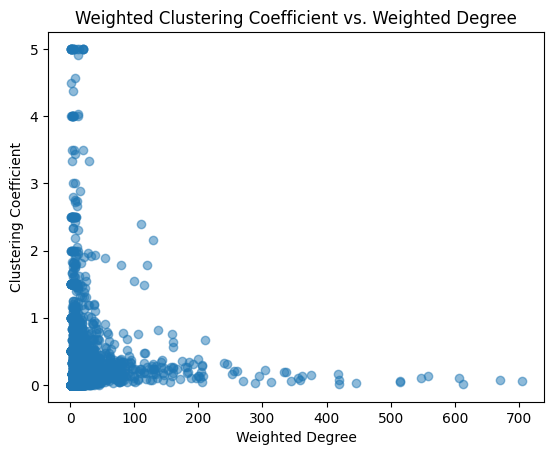

In [5]:
# Plot clustering coefficient vs. degree
degrees = [weighted_degree[n] for n in nodes]
clusts = [weighted_clustering[n] for n in nodes]
plt.scatter(degrees, clusts, alpha=0.5)
plt.title("Weighted Clustering Coefficient vs. Weighted Degree")
plt.xlabel("Weighted Degree")
plt.ylabel("Clustering Coefficient")
plt.show()